In [16]:
import pandas as pd
import numpy as np
import datetime
import string
import os
from matplotlib import pyplot as plt
from pathlib import Path

In [36]:
DATA_PATH = '../dataset'
RAW_DATA = os.path.join(DATA_PATH, 'raw_data.csv')
OUT_DATA = os.path.join(DATA_PATH, 'out.csv')
raw_dataset = pd.read_csv(RAW_DATA, keep_default_na=False)
dataset = pd.read_csv(OUT_DATA, keep_default_na=False)

In [18]:
s = dataset['Female'].to_numpy()
male = 0
female = 0
total = dataset.shape[0]
for i in s:
    if i == 0:
        male += 1
    elif i == 1:
        female += 1
unknown = total - male - female
gender = pd.DataFrame([[total,male,female,unknown]], columns=['Total','Male','Female','Unknown'])
gender

,Total,Male,Female,Unknown
0,2072,1297,775,0


In [19]:
diseases = pd.DataFrame()
def diseases_data(column_name):
    s = dataset[column_name].to_numpy(dtype = 'int')
    y = 0
    n = 0
    for i in s:
        if i == 1:
            y += 1
        elif i == 0:
            n += 1
    #if y + n != len(s):
    #    print('nan exists')
    row = diseases.shape[1]
    diseases.insert(row,column_name,[n,y])
diseases_data('adenovirus')
diseases_data('pertussis')
diseases_data('healthcare_associated_infection')
diseases_data('respiratory_syncytical_virus')

# add new columns to Dataframe diseases 
column_name = ['complication-gastroentiritis','complication-middle-ear-infec','complication-conjunctivitis','complication-laryngitis','complication-pneumonia-bronchitis',
'complication-febrile-seizures','complication-septic-shock-sepsis','co-infection-influenza-a','co-infection-influenza-b','co-infection-streptococus-aerius',
'co-infection-streptococus-pneumonia']

total = dataset.shape[0]
for col in column_name:
    row = diseases.shape[1]
    y = dataset[col].sum()
    diseases.insert(row,col,[total-y,y])

diseases

,adenovirus,pertussis,healthcare_associated_infection,respiratory_syncytical_virus,complication-gastroentiritis,complication-middle-ear-infec,complication-conjunctivitis,complication-laryngitis,complication-pneumonia-bronchitis,complication-febrile-seizures,complication-septic-shock-sepsis,co-infection-influenza-a,co-infection-influenza-b,co-infection-streptococus-aerius,co-infection-streptococus-pneumonia
0,1977,2055,2054,2042,2021,2042,2070,2065,659,2062,2068,2052,2072,2069,2070
1,95,17,18,30,51,30,2,7,1413,10,4,20,0,3,2


In [20]:
# Calculate number of patients in each place of exposure
in_nhp, in_another_hospital, in_community = 0, 0, 0
total = dataset.shape[0]

for i in dataset['place_of_exposure']:
    if i == 'NHP':
        in_nhp += 1
    elif i == 'Another hospital':
        in_another_hospital += 1
    elif i == 'community':
        in_community += 1
unknown = total - in_nhp - in_another_hospital - in_community
poe = pd.DataFrame([[total, in_nhp, in_another_hospital, in_community, unknown]], 
                    columns=['Total', 'NHP', 'Another hospital', 'Community', 'Unknown'])
poe

,Total,NHP,Another hospital,Community,Unknown
0,2072,547,241,1281,3


In [21]:
vacc = dataset['Vaccination'].to_numpy(dtype=str)
value_occurance = {}
for i in range(dataset.shape[0]):
    vacc = dataset.at[i,'Vaccination']
    if vacc in value_occurance:
        value_occurance[vacc] += 1
    else:
        value_occurance[vacc] = 1

item_list = sorted(list(value_occurance.items()))
vaccine_occurance = pd.DataFrame(item_list,columns=['Vaccine status','Occurance'])
vaccine_occurance

,Vaccine status,Occurance
0,0,1808
1,1,172
2,2,29
3,3,3
4,NA,60


In [22]:
# calculate vaccine status of patient > 9 months old
value_occurance = {}
for i in range(dataset.shape[0]):
    vacc = dataset.at[i,'Vaccination']
    if dataset.at[i,'age_at_admission'] >= 9:
        if 'Total' in value_occurance:
            value_occurance['Total'] += 1
        else:
            value_occurance["Total"] = 1
        if vacc in value_occurance:
            value_occurance[vacc] += 1
        else:
            value_occurance[vacc] = 1

item_list = sorted(list(value_occurance.items()))
vaccine_occurance_9_months = pd.DataFrame(item_list,columns=['Vaccine status','Occurance'])
vaccine_occurance_9_months

,Vaccine status,Occurance
0,0,938
1,1,163
2,2,27
3,3,3
4,NA,39
5,Total,1170


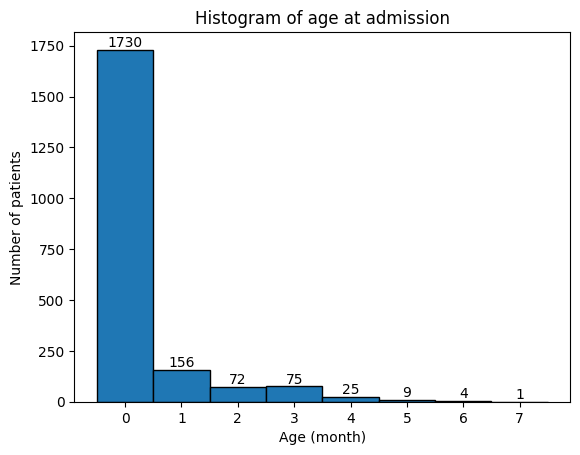

In [23]:
month_at_admission = dataset['age_at_admission'].to_numpy() // 30
max_month = np.max(month_at_admission)
val,bin = np.histogram(month_at_admission, bins=np.arange(max_month+2))

fig, ax = plt.subplots()

# Set title, add labels
ax.set_title("Histogram of age at admission")
ax.set_xlabel('Age (month)')
ax.set_ylabel('Number of patients')

# can add log = 'True' for better visualization
ax.hist(month_at_admission,bins = np.arange(max_month+2),align='left',edgecolor='black',label='Age at admission')
rects = ax.patches
  
for rect, label in zip(rects, val):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label, ha='center', va='bottom')

# remove this line to see the box plot
#plt.close()

In [24]:
def print_stats(array,array_name):
    array = array.astype(float)
    min = np.min(array)
    max = np.max(array)
    mean = np.mean(array)
    median = np.median(array)
    first_quartile = np.percentile(array, 25)
    third_quartile = np.percentile(array, 75)

    print(f'Min {array_name} = {min}')
    print(f'Max {array_name} = {max}')
    print(f'Mean {array_name} = {mean}')
    print(f'Median {array_name} = {median}')
    print(f'First quartile {array_name} = {first_quartile}')
    print(f'Third quartile {array_name} = {third_quartile}')

In [25]:
duration_of_stay = dataset['duration_of_stay'].to_numpy()

# don't need box plots yet
#plt.boxplot(duration_of_stay,showmeans=True,vert=False)
#plt.show()

print_stats(duration_of_stay,'duration of stay')

duration_group = [0,3,8,15]
occurance_of_duraion_group = [0] * 4

for i in duration_of_stay:
    for j in range(3,-1,-1):
        if i >= duration_group[j]:
            occurance_of_duraion_group[j] += 1
            break

stay_duration = pd.DataFrame([occurance_of_duraion_group], columns=['< 3','3 - 7','8 - 14','> 14'])
stay_duration

Min duration of stay = 1.0
Max duration of stay = 170.0
Mean duration of stay = 11.445945945945946
Median duration of stay = 6.0
First quartile duration of stay = 4.0
Third quartile duration of stay = 12.0


,< 3,3 - 7,8 - 14,> 14
0,204,1002,455,411


In [26]:
test_date_to_test_result = dataset['testresult_date'].to_numpy(dtype='datetime64') - dataset['test_date'].to_numpy(dtype='datetime64')

print_stats(test_date_to_test_result,'test duration')

day_group = [0,1,2,3]
occurance_of_day_group = [0] * 4

for i in test_date_to_test_result:
    for j in range(3,-1,-1):
        if i >= day_group[j]:
            occurance_of_day_group[j] += 1
            break

test_duration = pd.DataFrame([occurance_of_day_group], columns=['0','1','2','> 2'])
test_duration

Min test duration = 0.0
Max test duration = 5.0
Mean test duration = 0.7065637065637066
Median test duration = 1.0
First quartile test duration = 0.0
Third quartile test duration = 1.0


,0,1,2,> 2
0,796,1106,155,15


In [27]:
onset_date_to_admission_date = dataset['admission_date'].to_numpy(dtype='datetime64') - dataset['onset_date'].to_numpy(dtype='datetime64')
print_stats(onset_date_to_admission_date,'onset to admission')

Min onset to admission = -118.0
Max onset to admission = 1828.0
Mean onset to admission = 2.111969111969112
Median onset to admission = 1.0
First quartile onset to admission = -1.0
Third quartile onset to admission = 3.0


In [28]:
onset_date_to_test_date = dataset['test_date'].to_numpy(dtype='datetime64') - dataset['onset_date'].to_numpy(dtype='datetime64')
print_stats(onset_date_to_test_date,'onset to test')

Min onset to test = -75.0
Max onset to test = 1828.0
Mean onset to test = 5.374517374517374
Median onset to test = 2.0
First quartile onset to test = 0.0
Third quartile onset to test = 3.0


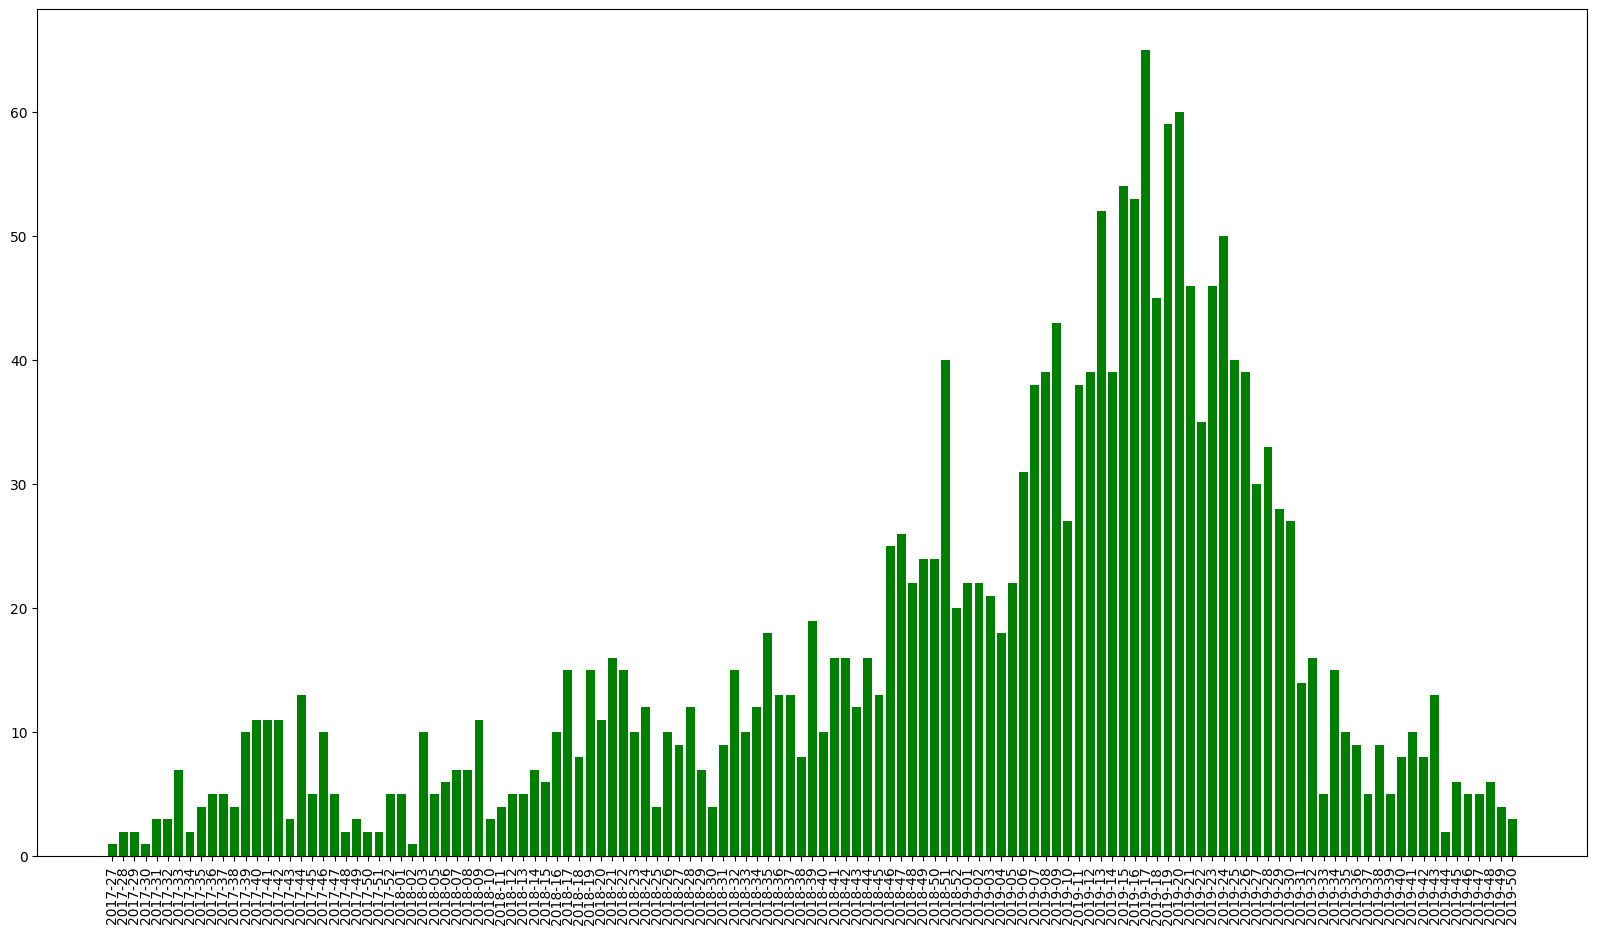

,2017,2018,2019
0,132,621,1319


In [29]:
admission = [datetime.datetime.strptime(_, '%Y-%m-%d') for _ in dataset['admission_date'].to_numpy(dtype='str').tolist()]
admission_year = [x.year for x in admission]

occurance_of_year = {}

for i in admission_year:
    if i not in occurance_of_year:
        occurance_of_year[i] = 1
    else:
        occurance_of_year[i] += 1

x = list(occurance_of_year.items())
x.sort()
occurance_value = [current_year[1] for current_year in x]
year_occurance = pd.DataFrame([occurance_value],columns = ['2017','2018','2019'])

admission_datetime = []
week_occurance = {}
for i in admission:
    current_week = i.strftime("%V")
    current_year = i.year
    current_time = str(current_year) + '-' + current_week
    if current_time not in week_occurance:
        week_occurance[current_time] = 1
    else:
        week_occurance[current_time] += 1

dict_list = [(k, v) for k, v in week_occurance.items()]
dict_list.sort()
year_week = [current_week[0] for current_week in dict_list]
week_occurance = [current_week[1] for current_week in dict_list]

plt.figure(figsize=(20,11))
plt.bar(year_week, week_occurance, color='g')
plt.xticks(rotation=90)

# comment this line to see the bar chart
#plt.close()

plt.show()
year_occurance

In [39]:
order = ['oxygen_cannula','CPAP','conventional_mechanical_ventilation','hfo_ventilation','ECMO']
patient_per_ventilation_mode = [0] * 5

for i in range(len(dataset)):
    for j in range(len(order)-1,-1,-1):
        if dataset.loc[i,order[j]] == 1:
            patient_per_ventilation_mode[j] += 1
            break

ventilation_mode = pd.DataFrame([patient_per_ventilation_mode],columns = order)
ventilation_mode

,oxygen_cannula,CPAP,conventional_mechanical_ventilation,hfo_ventilation,ECMO
0,685,8,144,11,1


In [38]:
stage_of_discharge_value = ['BN khong nhap vien','Bo ve','Chuyen vien','Ra vi<U+1EC7>n','Ra vien',
'Tu vong','Xin ve','chua ra vien','do giam','do, giam ','khoi','tu vong']
stage_of_discharge_new_value = ['khong nhap vien','bo ve','chuyen vien','ra vien','ra vien',
'tu vong','xin ve','chua ra vien','giam','giam','khoi','tu vong']

for i in range(len(dataset)):
    for j in range(len(stage_of_discharge_value)):
        if raw_dataset.loc[i,'Stage of discharge'] == stage_of_discharge_value[j]:
            raw_dataset.loc[i,'Stage of discharge'] = stage_of_discharge_new_value[j]
            break

column_name = ['dead','discharge','alive at hospital']
patient_result = [0] * 3
discharge_stage = ['ra vien','chuyen vien','xin ve']


for i in range(len(dataset)):
    if dataset.loc[i,'outcome_died'] == 1:
        patient_result[0] += 1
    elif raw_dataset.loc[i,'Stage of discharge'] in discharge_stage:
        patient_result[1] += 1
    else:
        patient_result[2] += 1

patient_result = pd.DataFrame([patient_result],columns = column_name)
patient_result

,dead,discharge,alive at hospital
0,30,1907,135


In [40]:
patient_location = dataset[['patient_home_coordinate','distance_to_nhp']].copy()
patient_location.insert(0,'index',range(0, len(patient_location)))
patient_location

,index,patient_home_coordinate,distance_to_nhp
0,0,"21.193090,105.528750",50.175
1,1,"21.255690,105.489280",58.479
2,2,"21.012180,105.814210",2.251
3,3,"18.975670,105.608640",260.791
4,4,"20.891280,106.136410",53.506
...,...,...,...
2067,2067,"18.680380,105.670470",295.232
2068,2068,"19.416320,105.792860",204.174
2069,2069,"23.054850,105.286300",399.714
2070,2070,"20.967980,107.108460",170.784


In [42]:
province = dataset['province'].to_numpy(dtype='str')
patient_per_province = {}

for i in province:
    if i in patient_per_province:
        patient_per_province[i] += 1
    else:
        patient_per_province[i] = 1
        
province_items = patient_per_province.items()
sorted_province = sorted(province_items, key=lambda province_items: province_items[0])
province_list = [i[0] for i in sorted_province]
patient_list = [i[1] for i in sorted_province]
patient_percentage_list = [str(round(i/sum(patient_list)*100,2)) + '%' for i in patient_list]
province_stat = pd.DataFrame([province_list,patient_list,patient_percentage_list],index=['Province','Patient','Percentage']).T
province_stat

,Province,Patient,Percentage
0,Can Tho,1,0.05%
1,Ba Ria - Vung Tau,1,0.05%
2,Bac Giang,53,2.56%
3,Bac Kan,4,0.19%
4,Bac Ninh,106,5.12%
5,Cao Bang,2,0.1%
6,Dak Lak,2,0.1%
7,Dong Nai,2,0.1%
8,Ha Giang,15,0.72%
9,Ha Nam,101,4.87%


In [44]:
part_of_vietnam = ['Ha Noi','Northern Vietnam (exclude Ha Noi)','Central Vietnam','Southern Vietnam']
north_province = ['Ha Noi','Bac Kan','Bac Ninh','Bac Giang','Cao Bang','Ha Giang','Ha Nam',
                    'Hai Duong','Hai Phong','Hoa Binh','Hung Yen','Nam Dinh','Ninh Binh','Phu Tho',
                    'Quang Ninh','Thai Binh','Vinh Phuc','Yen Bai','Lao Cai','Son La','Thai Nguyen',
                    'Tuyen Quang','Lai Chau','Lang Son']

central_province = ['Thanh Hoa','Nghe An','Ha Tinh','Quang Binh','Quang Tri','Thua Thien Hue','Quang Nam','Quang Ngai',
                    'Binh Dinh','Phu Yen','Khanh Hoa','Ninh Thuan','Binh Thuan','Kon Tum','Gia Lai','Dak Lak']

south_province = ['Binh Phuoc','Binh Duong','Dong Nai','Tay Ninh','Ba Ria - Vung Tau','Ho Chi Minh','Long An',
                    'Dong Thap','Tien Giang','An Giang','Ben Tre','Can Tho']

patient_per_part = [0] * 4
for i in range(len(province_list)):
    if province_list[i] in north_province:
        if province_list[i] == 'Ha Noi':
            patient_per_part[0] += patient_list[i]
        else:
            patient_per_part[1] += patient_list[i]
    if province_list[i] in central_province:
        patient_per_part[2] += patient_list[i]
    if province_list[i] in south_province:
        patient_per_part[3] += patient_list[i]

patient_per_part_percentage = [str(round(i/sum(patient_per_part)*100,2)) + '%' for i in patient_per_part]
part_stat = pd.DataFrame([part_of_vietnam,patient_per_part,patient_per_part_percentage],index=['Part','Patient','Percentage']).T
part_stat

,Part,Patient,Percentage
0,Ha Noi,714,34.48%
1,Northern Vietnam (exclude Ha Noi),1029,49.69%
2,Central Vietnam,321,15.5%
3,Southern Vietnam,7,0.34%


In [47]:
year_and_province = [[0] * 4 for _ in range(len(province_list))]

for i in range(len(province_list)):
    year_and_province[i][0] = province_list[i]

for i in range(len(dataset)):
    year = int(dataset.at[i,'admission_date'][:4])
    province = dataset.loc[i,'province']
    year = year - 2016
    index = province_list.index(province)
    year_and_province[index][year] += 1

year_and_province_stat = pd.DataFrame(year_and_province,columns=['Province','2017','2018','2019'])
year_and_province_stat

,Province,2017,2018,2019
0,Can Tho,0,0,1
1,Ba Ria - Vung Tau,0,0,1
2,Bac Giang,3,12,38
3,Bac Kan,1,2,1
4,Bac Ninh,2,27,77
5,Cao Bang,0,1,1
6,Dak Lak,1,0,1
7,Dong Nai,0,0,2
8,Ha Giang,1,3,11
9,Ha Nam,3,28,70


In [48]:
underlying_condition_pd = pd.DataFrame([[0]*9 for _ in range(3)],index=['underlying_codition','yes','no']).T

underlying_condition = ['Underlying conditions - Respiratory system','Underlying conditions - Cardiovascular system',
    'Underlying condition - Gastrointestinal system','Underlying condition - Kidney and urology system',
    'Underlying condition - Immunodeficiency','Underlying condition - Neurological system','Underlying condition - Inherited metabolic disorders',
    'Underlying condition - No underlying diseases','Underlying condition - Other underlying conditions']

for i in range(len(underlying_condition)):
    column_name = underlying_condition[i]
    if 'Underlying conditions - ' in column_name:
        col1 = column_name.replace('Underlying conditions - ','')
    else:
        col1 = column_name.replace('Underlying condition - ','')
    
    col2 = dataset[column_name].sum()
    col3 = len(dataset) - col2
    underlying_condition_pd.iloc[i] = [col1,col2,col3]

underlying_condition_pd


,underlying_codition,yes,no
0,Respiratory system,42,2030
1,Cardiovascular system,72,2000
2,Gastrointestinal system,94,1978
3,Kidney and urology system,46,2026
4,Immunodeficiency,12,2060
5,Neurological system,73,1999
6,Inherited metabolic disorders,15,2057
7,No underlying diseases,1585,487
8,Other underlying conditions,1744,328
